In [1]:
from os.path import join
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
#%pip install minisom
from minisom import MiniSom

## Import Matplotlib functions to create MiniSOM visualizations

from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors
from matplotlib.colors import LinearSegmentedColormap

from matplotlib.lines import Line2D
import seaborn as sns

from matplotlib import __version__ as mplver



from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from minisom import MiniSom

In [3]:
df=pd.read_csv('../data/processed_ABCDEats_data.csv')
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,weekend_ratio,lunch_orders,dinner_orders,meal_preference,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders,primary_time_period
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,1.0,0,2,dinner,0,0,2,0,0,evening
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,1.0,1,0,lunch,1,1,0,0,0,morning
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,1.0,1,0,lunch,1,1,0,0,0,morning
3,180c632ed8,4660,24,2,3,1,0,2,DELIVERY,DIGI,...,0.5,1,0,lunch,0,2,0,0,0,midday
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,0.5,0,0,dinner,2,0,0,0,0,morning


In [4]:
df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'total_spending', 'total_orders', 'cuisine_diversity',
       'primary_cuisine', 'weekend_orders', 'underweekend_orders',
       'weekend_ratio', 'lunch_orders', 'dinner_orders', 'meal_preference',
       'morning_orders', 'midday_orders', 'evening_orde

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31737 non-null  object 
 1   customer_region           31737 non-null  object 
 2   customer_age              31737 non-null  int64  
 3   vendor_count              31737 non-null  int64  
 4   product_count             31737 non-null  int64  
 5   is_chain                  31737 non-null  int64  
 6   first_order               31737 non-null  int64  
 7   last_order                31737 non-null  int64  
 8   last_promo                31737 non-null  object 
 9   payment_method            31737 non-null  object 
 10  CUI_American              31737 non-null  int64  
 11  CUI_Asian                 31737 non-null  int64  
 12  CUI_Beverages             31737 non-null  int64  
 13  CUI_Cafe                  31737 non-null  int64  
 14  CUI_Ch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
filepath = "../data/processed_ABCDEats_data.csv"
# Load the dataset
def load_and_preprocess_data(file_path):
    """
    Load the dataset and prepare it for SOM analysis
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    
    Returns:
    --------
    X : numpy array
        Scaled feature matrix
    df : pandas DataFrame
        Original dataframe for reference
    feature_names : list
        List of feature names used in scaling
    """
    # Read the CSV
    df = pd.read_csv(file_path)
    
    # Select features for SOM
    # Exclude non-numeric or identifying columns
    feature_columns = [
        # Demographic features
        'customer_age', 
        
        # Ordering and spending features
        'vendor_count', 'product_count', 
        'total_spending', 'total_orders', 
        'cuisine_diversity',
        
        # Cuisine preferences (CUI columns)
        'CUI_American', 'CUI_Asian', 'CUI_Beverages', 
        'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 
        'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 
        'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
        'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai',
        
        # Temporal features
        'weekend_ratio', 
        'lunch_orders', 'dinner_orders', 
        'morning_orders', 'midday_orders', 
        'evening_orders', 'night_orders', 
        'drinking_orders'
    ]
    
    # Prepare the feature matrix
    X = df[feature_columns].values
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, df, feature_columns

# Create Self-Organizing Map
def create_som(X, map_size=(10, 10), sigma=1.0, learning_rate=0.5, iterations=10000):
    """
    Create and train a Self-Organizing Map
    
    Parameters:
    -----------
    X : numpy array
        Scaled feature matrix
    map_size : tuple, optional
        Size of the SOM grid (default: 10x10)
    sigma : float, optional
        Radius of the neighborhood function (default: 1.0)
    learning_rate : float, optional
        Initial learning rate (default: 0.5)
    iterations : int, optional
        Number of training iterations (default: 10000)
    
    Returns:
    --------
    som : MiniSom
        Trained Self-Organizing Map
    """
    # Get the number of features
    input_len = X.shape[1]
    
    # Initialize the SOM
    som = MiniSom(map_size[0], map_size[1], input_len, 
                  sigma=sigma, 
                  learning_rate=learning_rate,
                  neighborhood_function='gaussian',
                  random_seed=42)
    
    # Initialize the weights
    som.random_weights_init(X)
    
    # Train the SOM
    som.train_random(X, iterations)
    
    return som

# Visualize the SOM
def visualize_som(som, X, df, feature_columns):
    """
    Create various visualizations of the Self-Organizing Map
    
    Parameters:
    -----------
    som : MiniSom
        Trained Self-Organizing Map
    X : numpy array
        Scaled feature matrix
    df : pandas DataFrame
        Original dataframe
    feature_columns : list
        List of features used in scaling
    """
    # Visualize the feature weights
    plt.figure(figsize=(15, 10))
    plt.title('SOM Feature Weights Heatmap')
    
    # Plot feature importance for each neuron
    feature_importance = []
    weights = som.get_weights()
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            neuron_weights = weights[i, j, :]
            feature_importance.append(neuron_weights)
    
    feature_importance = np.array(feature_importance)
    
    # Visualize feature distribution across neurons
    plt.imshow(feature_importance, aspect='auto', cmap='viridis')
    plt.colorbar(label='Feature Weight')
    plt.xlabel('Features')
    plt.ylabel('Neurons')
    plt.xticks(range(len(feature_columns)), feature_columns, rotation=90)
    plt.tight_layout()
    plt.savefig('som_feature_weights.png')
    plt.close()
    
    # Clustering and Visualization
    # Find the winning neuron for each data point
    winning_neurons = np.zeros((X.shape[0], 2), dtype=int)
    for i, x in enumerate(X):
        winning_neurons[i] = som.winner(x)
    
    # Add neuron coordinates to the original dataframe
    df['neuron_x'] = winning_neurons[:, 0]
    df['neuron_y'] = winning_neurons[:, 1]
    
    # Visualize customer distribution across neurons
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(winning_neurons[:, 0], winning_neurons[:, 1], 
                          c=df['total_spending'], 
                          cmap='coolwarm', 
                          alpha=0.6)
    plt.colorbar(scatter, label='Total Spending')
    plt.title('Customer Distribution across SOM Neurons')
    plt.xlabel('Neuron X')
    plt.ylabel('Neuron Y')
    plt.tight_layout()
    plt.savefig('som_customer_distribution.png')
    plt.close()
    
    # Analyze neuron characteristics
    neuron_summary = df.groupby(['neuron_x', 'neuron_y']).agg({
        'customer_age': 'mean',
        'total_spending': 'mean',
        'total_orders': 'mean',
        'cuisine_diversity': 'mean'
    }).reset_index()
    
    #print("Neuron Characteristics Summary:")
    #print(neuron_summary)
    #neuron_summary.to_csv('som_neuron_summary.csv', index=False)

# Main execution
def main(file_path):
    # Load and preprocess data
    X_scaled, df, feature_columns = load_and_preprocess_data(file_path)
    
    # Create SOM
    som = create_som(X_scaled)
    
    # Visualize SOM
    visualize_som(som, X_scaled, df, feature_columns)

# Example usage
main('../data/processed_ABCDEats_data.csv')

if __name__ == '__main__':
    
    #print("SOM Analysis Script for Customer Segmentation")
    #print("Note: Replace 'your_preprocessed_dataset.csv' with actual file path")

Neuron Characteristics Summary:
    neuron_x  neuron_y  customer_age  total_spending  total_orders  \
0          0         0     27.292683      150.731707     18.000000   
1          0         1     30.153846      247.615385     34.384615   
2          0         2     28.966667      256.566667     27.366667   
3          0         3     27.147059      174.823529     20.441176   
4          0         4     26.500000      318.000000     33.166667   
..       ...       ...           ...             ...           ...   
95         9         5     26.568659       13.822698      1.320275   
96         9         6     26.012146       53.568151      2.812416   
97         9         7     27.839662      115.151899      4.801688   
98         9         8     28.082192      245.191781      9.876712   
99         9         9     27.533333      207.666667     17.466667   

    cuisine_diversity  
0            3.804878  
1            6.000000  
2            4.900000  
3            5.764706  
4      

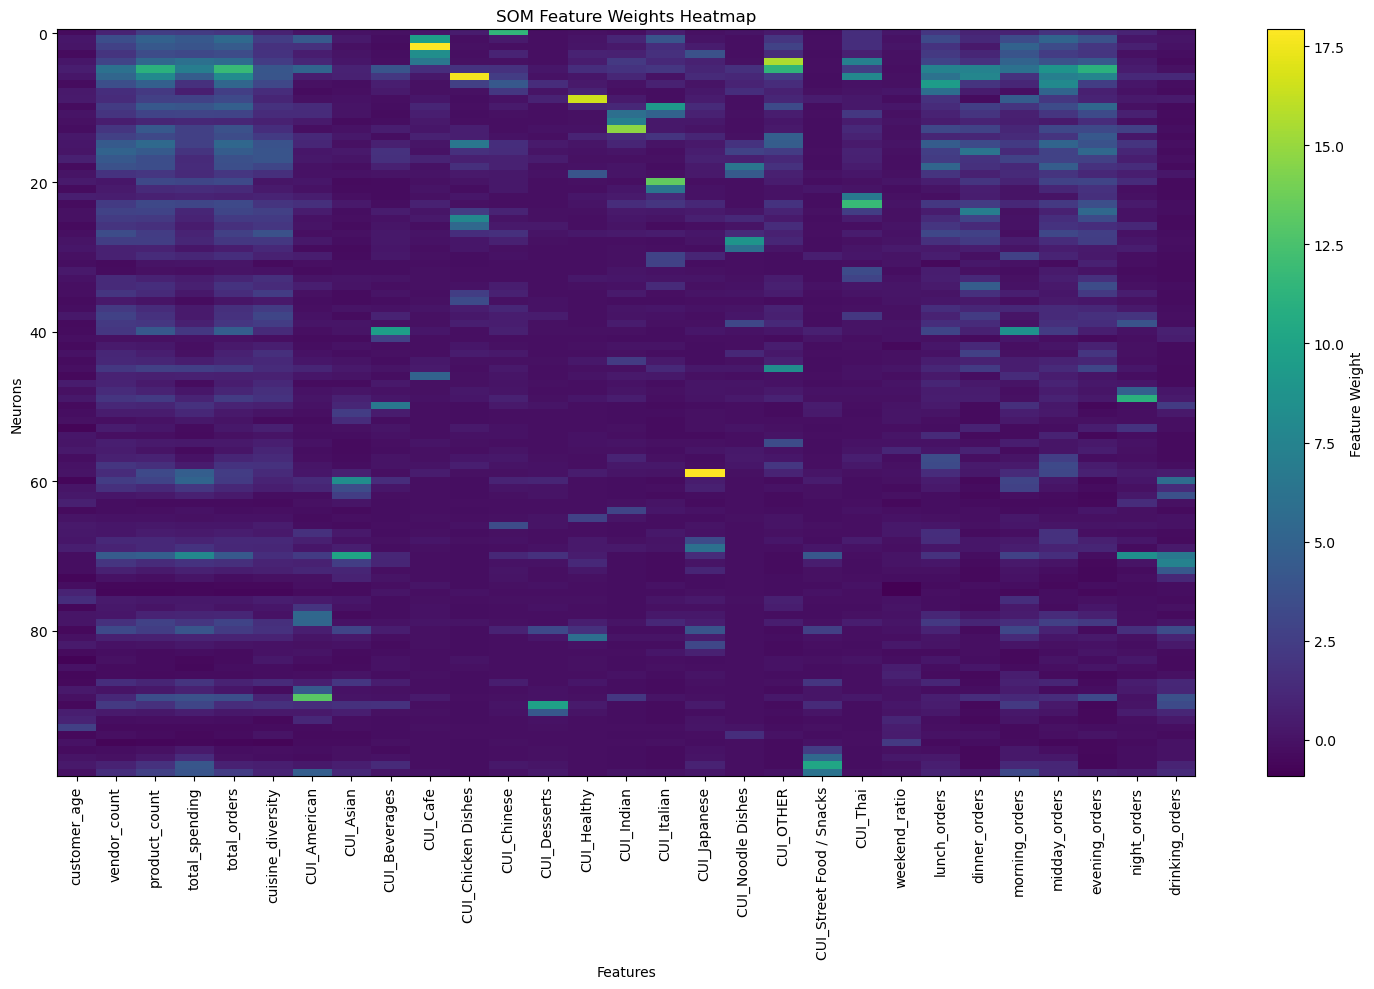

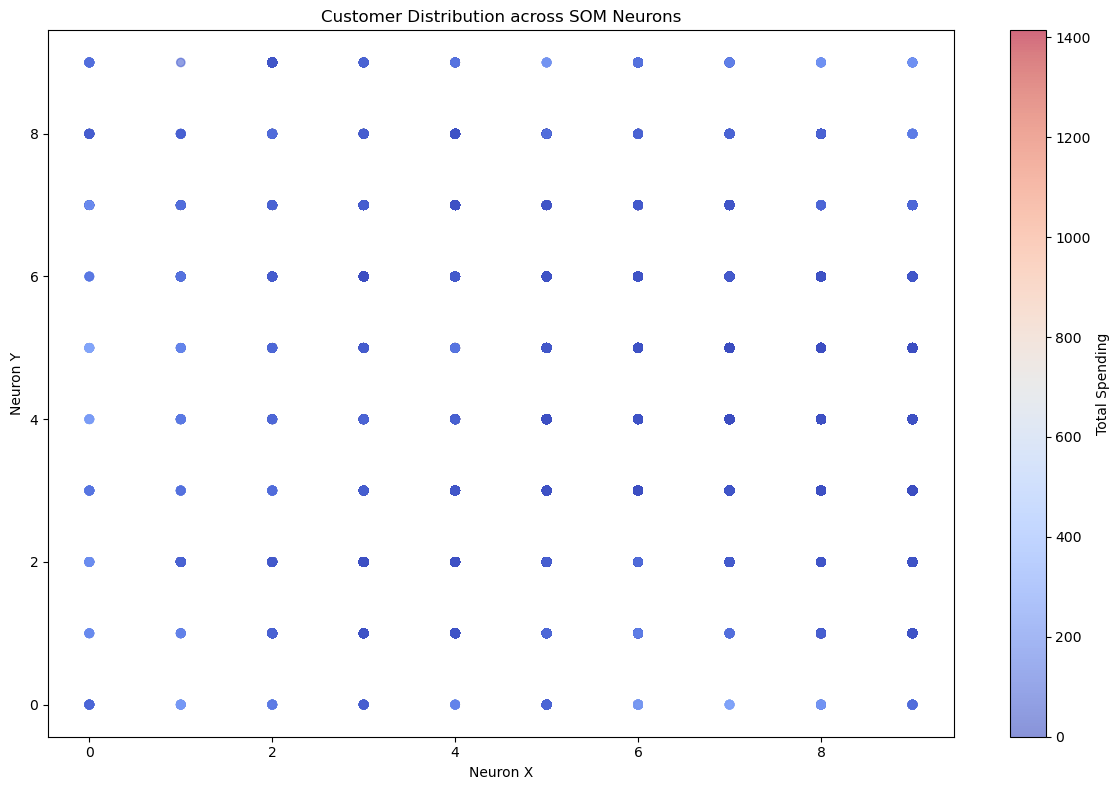

Neuron Characteristics Summary:
    neuron_x  neuron_y  customer_age  total_spending  total_orders  \
0          0         0     27.292683      150.731707     18.000000   
1          0         1     30.153846      247.615385     34.384615   
2          0         2     28.966667      256.566667     27.366667   
3          0         3     27.147059      174.823529     20.441176   
4          0         4     26.500000      318.000000     33.166667   
..       ...       ...           ...             ...           ...   
95         9         5     26.568659       13.822698      1.320275   
96         9         6     26.012146       53.568151      2.812416   
97         9         7     27.839662      115.151899      4.801688   
98         9         8     28.082192      245.191781      9.876712   
99         9         9     27.533333      207.666667     17.466667   

    cuisine_diversity  
0            3.804878  
1            6.000000  
2            4.900000  
3            5.764706  
4      

In [4]:
# Customer Segmentation using Self-Organizing Maps (SOM)

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom

# Load the dataset
def load_and_preprocess_data(file_path):
    """
    Load the dataset and prepare it for SOM analysis
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    
    Returns:
    --------
    X : numpy array
        Scaled feature matrix
    df : pandas DataFrame
        Original dataframe for reference
    feature_names : list
        List of feature names used in scaling
    """
    # Read the CSV
    df = pd.read_csv(file_path)
    
    # Select features for SOM
    feature_columns = [
        # Demographic features
        'customer_age', 
        
        # Ordering and spending features
        'vendor_count', 'product_count', 
        'total_spending', 'total_orders', 
        'cuisine_diversity',
        
        # Cuisine preferences (CUI columns)
        'CUI_American', 'CUI_Asian', 'CUI_Beverages', 
        'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 
        'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 
        'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
        'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai',
        
        # Temporal features
        'weekend_ratio', 
        'lunch_orders', 'dinner_orders', 
        'morning_orders', 'midday_orders', 
        'evening_orders', 'night_orders', 
        'drinking_orders'
    ]
    
    # Prepare the feature matrix
    X = df[feature_columns].values
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, df, feature_columns

# Create Self-Organizing Map
def create_som(X, map_size=(10, 10), sigma=1.0, learning_rate=0.5, iterations=10000):
    """
    Create and train a Self-Organizing Map
    
    Parameters:
    -----------
    X : numpy array
        Scaled feature matrix
    map_size : tuple, optional
        Size of the SOM grid (default: 10x10)
    sigma : float, optional
        Radius of the neighborhood function (default: 1.0)
    learning_rate : float, optional
        Initial learning rate (default: 0.5)
    iterations : int, optional
        Number of training iterations (default: 10000)
    
    Returns:
    --------
    som : MiniSom
        Trained Self-Organizing Map
    """
    # Get the number of features
    input_len = X.shape[1]
    
    # Initialize the SOM
    som = MiniSom(map_size[0], map_size[1], input_len, 
                  sigma=sigma, 
                  learning_rate=learning_rate,
                  neighborhood_function='gaussian',
                  random_seed=42)
    
    # Initialize the weights
    som.random_weights_init(X)
    
    # Train the SOM
    som.train_random(X, iterations)
    
    return som

# Visualize the SOM
def visualize_som(som, X, df, feature_columns):
    """
    Create various visualizations of the Self-Organizing Map
    
    Parameters:
    -----------
    som : MiniSom
        Trained Self-Organizing Map
    X : numpy array
        Scaled feature matrix
    df : pandas DataFrame
        Original dataframe
    feature_columns : list
        List of features used in scaling
    
    Returns:
    --------
    winning_neurons : numpy array
        Neuron coordinates for each data point
    """
    # Visualize the feature weights
    plt.figure(figsize=(15, 10))
    plt.title('SOM Feature Weights Heatmap')
    
    # Plot feature importance for each neuron
    feature_importance = []
    weights = som.get_weights()
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            neuron_weights = weights[i, j, :]
            feature_importance.append(neuron_weights)
    
    feature_importance = np.array(feature_importance)
    
    # Visualize feature distribution across neurons
    plt.imshow(feature_importance, aspect='auto', cmap='viridis')
    plt.colorbar(label='Feature Weight')
    plt.xlabel('Features')
    plt.ylabel('Neurons')
    plt.xticks(range(len(feature_columns)), feature_columns, rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Find the winning neuron for each data point
    winning_neurons = np.zeros((X.shape[0], 2), dtype=int)
    for i, x in enumerate(X):
        winning_neurons[i] = som.winner(x)
    
    # Add neuron coordinates to the original dataframe
    df['neuron_x'] = winning_neurons[:, 0]
    df['neuron_y'] = winning_neurons[:, 1]
    
    # Visualize customer distribution across neurons
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(winning_neurons[:, 0], winning_neurons[:, 1], 
                          c=df['total_spending'], 
                          cmap='coolwarm', 
                          alpha=0.6)
    plt.colorbar(scatter, label='Total Spending')
    plt.title('Customer Distribution across SOM Neurons')
    plt.xlabel('Neuron X')
    plt.ylabel('Neuron Y')
    plt.tight_layout()
    plt.show()
    
    # Analyze neuron characteristics
    neuron_summary = df.groupby(['neuron_x', 'neuron_y']).agg({
        'customer_age': 'mean',
        'total_spending': 'mean',
        'total_orders': 'mean',
        'cuisine_diversity': 'mean'
    }).reset_index()
    
    print("Neuron Characteristics Summary:")
    print(neuron_summary)
    
    return winning_neurons

# Main analysis function
def perform_som_analysis(file_path, map_size=(10, 10), iterations=10000):
    """
    Perform complete SOM analysis on the dataset
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    map_size : tuple, optional
        Size of the SOM grid (default: 10x10)
    iterations : int, optional
        Number of training iterations (default: 10000)
    """
    # Load and preprocess data
    X_scaled, df, feature_columns = load_and_preprocess_data(file_path)
    
    # Create SOM
    som = create_som(X_scaled, map_size=map_size, iterations=iterations)
    
    # Visualize SOM and get neuron mapping
    winning_neurons = visualize_som(som, X_scaled, df, feature_columns)
    
    return som, X_scaled, df, winning_neurons

# Example usage (uncomment and modify file path when ready)
file_path = '../data/processed_ABCDEats_data.csv'
som, X_scaled, df, winning_neurons = perform_som_analysis(file_path)

# Additional optional analysis
def cluster_analysis(df, winning_neurons):
    """
    Perform additional cluster analysis based on SOM results
    
    Parameters:
    -----------
    df : pandas DataFrame
        Original dataframe with neuron assignments
    winning_neurons : numpy array
        Neuron coordinates for each data point
    """
    # Calculate cluster sizes
    cluster_sizes = pd.DataFrame(winning_neurons, columns=['neuron_x', 'neuron_y']) \
        .groupby(['neuron_x', 'neuron_y']).size().reset_index(name='cluster_size')
    
    print("\nCluster Sizes:")
    print(cluster_sizes)
    
    # Analyze cluster characteristics
    cluster_profiles = df.groupby(['neuron_x', 'neuron_y']).agg({
        'total_spending': ['mean', 'max', 'min'],
        'total_orders': ['mean', 'max', 'min'],
        'customer_age': ['mean', 'median']
    })
    
    print("\nCluster Profiles:")
    print(cluster_profiles)
    
    return cluster_sizes, cluster_profiles

# Uncomment and modify when running the full analysis
cluster_sizes, cluster_profiles = cluster_analysis(df, winning_neurons)

# Optional: Save results
def save_som_results(df, som, X_scaled, feature_columns, output_dir='./som_results'):
    """
    Save SOM analysis results to files
    
    Parameters:
    -----------
    df : pandas DataFrame
        Original dataframe with neuron assignments
    som : MiniSom
        Trained Self-Organizing Map
    X_scaled : numpy array
        Scaled feature matrix
    feature_columns : list
        List of features used
    output_dir : str, optional
        Directory to save results (default: './som_results')
    """
    import os
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Save neuron assignments
    df[['customer_id', 'neuron_x', 'neuron_y']].to_csv(
        os.path.join(output_dir, 'neuron_assignments.csv'), 
        index=False
    )
    
    np.save(os.path.join(output_dir, 'som_weights.npy'), som.get_weights())
    np.save(os.path.join(output_dir, 'som_weights.npy'), som.weights)
    
# Uncomment and modify when ready to save results
# save_som_results(df, som, X_scaled, feature_columns)

print("SOM Analysis Script Ready for Execution!")